In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite").connect()

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes found from automap
Base.classes.keys()

#A: ['measurement', 'station']

['measurement', 'station']

In [7]:
results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= prev_year).all()results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= prev_year).all()results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= prev_year).all()# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create session (link) from Python to the database
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
test = session.query(Measurement.date).all()
test

[('2010-01-01',),
 ('2010-01-02',),
 ('2010-01-03',),
 ('2010-01-04',),
 ('2010-01-06',),
 ('2010-01-07',),
 ('2010-01-08',),
 ('2010-01-09',),
 ('2010-01-10',),
 ('2010-01-11',),
 ('2010-01-12',),
 ('2010-01-14',),
 ('2010-01-15',),
 ('2010-01-16',),
 ('2010-01-17',),
 ('2010-01-18',),
 ('2010-01-19',),
 ('2010-01-20',),
 ('2010-01-21',),
 ('2010-01-22',),
 ('2010-01-23',),
 ('2010-01-24',),
 ('2010-01-25',),
 ('2010-01-26',),
 ('2010-01-27',),
 ('2010-01-28',),
 ('2010-01-30',),
 ('2010-01-31',),
 ('2010-02-01',),
 ('2010-02-03',),
 ('2010-02-04',),
 ('2010-02-05',),
 ('2010-02-06',),
 ('2010-02-07',),
 ('2010-02-08',),
 ('2010-02-09',),
 ('2010-02-11',),
 ('2010-02-12',),
 ('2010-02-13',),
 ('2010-02-14',),
 ('2010-02-15',),
 ('2010-02-16',),
 ('2010-02-17',),
 ('2010-02-19',),
 ('2010-02-20',),
 ('2010-02-21',),
 ('2010-02-22',),
 ('2010-02-23',),
 ('2010-02-24',),
 ('2010-02-25',),
 ('2010-02-26',),
 ('2010-02-28',),
 ('2010-03-01',),
 ('2010-03-02',),
 ('2010-03-03',),
 ('2010-03

In [10]:
# Find most recent date in the data set.
# A: ('2017-08-23',)

last_data_point = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_data_point

('2017-08-23',)

In [ ]:
##Instructions:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data


In [12]:
# Calculate the date one year from the last date in data set
year_ago = dt.date(2017,8,23) - dt.timedelta(days= 365)
print(year_ago)

2016-08-23


In [13]:
# Perform a query to retrieve the data and precipitation scores
data_precip_scores = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= year_ago, Measurement.prcp != None).\
    order_by(Measurement.date).all()

In [14]:
# Save query results as a Pandas DataFrame. Set the column names. Sort by date. 
df = pd.DataFrame(data_precip_scores, columns=['Date', 'Precipitation'])
df.set_index('Date', inplace=True)
df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79


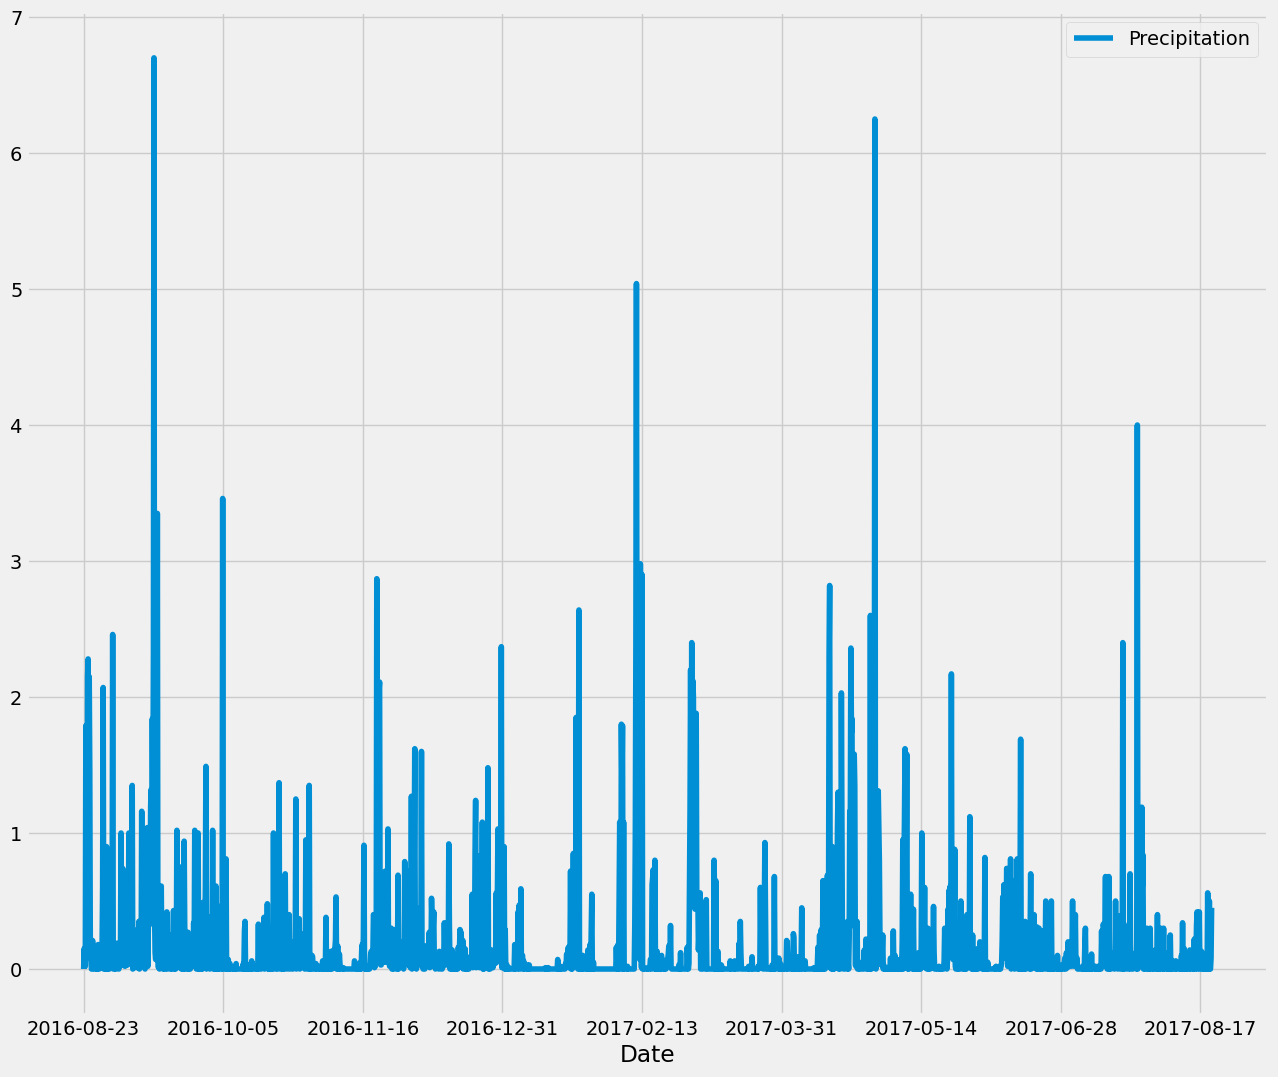

In [15]:
# Use Pandas Plotting with Matplotlib, plot data
df.plot(figsize=(13,11))
plt.tight_layout()
plt.savefig('Precipitation.png')

In [16]:
# Calculate the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number of stations 
#A: [(9,)]
session.query(Measurement.station).distinct().count()

9

In [18]:
# Design a query to find the most active stations 
# List the stations/counts in descending order
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_result = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').order_by(func.min(Measurement.tobs)).all()
temp_result

[(54.0, 85.0, 71.66378066378067)]

In [20]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

year_temp = session.query(Measurement.tobs).\
    filter(Measurement.date >= year_ago, Measurement.station == 'USC00519281').\
    order_by(Measurement.tobs).all()

In [29]:
#df['Date'].dtype
df.columns

Index(['Precipitation'], dtype='object')

Text(16.03333333333333, 0.5, 'Frequency')

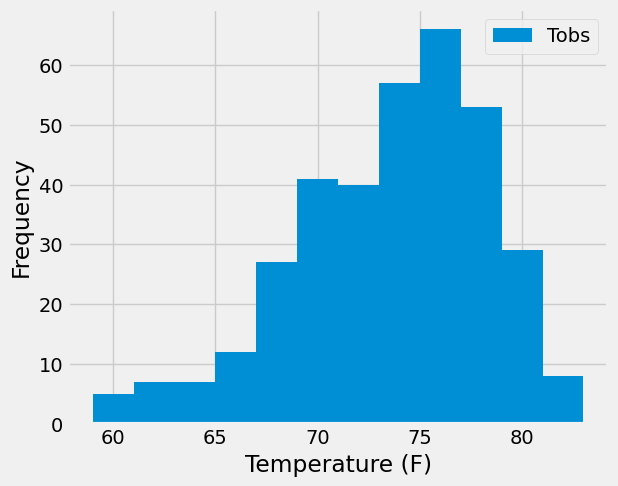

In [35]:
# Query the last 12 months of temperature observation data for this station, plot the results as a histogram
#df1 = pd.DataFrame(year_temp['Tobs'], columns=['Tobs'])

latest_temp_data = dt.date(2017,8,23) - dt.timedelta(days = 365)

# Create a new DataFrame
df = pd.DataFrame(year_temp, columns = ['Tobs'])

# Filter data for the most active station past 12 months 
# df1 = year_temp[year_temp['station_id'] == most_active_station_id].set_index('date')

# Plot the histogram
bins = 12
#df['Tobs'].plot.hist(bins=bins, legend=False)
#plt.ylim(0,70)
#plt.title('Temperature Observation Histogram')
#plt.xlabel('Temperature (F)')
#plt.ylabel('Frequency')
#plt.savefig('station-histogram.png')
#plt.show()

# Plot the histogram
df.plot.hist(bins=bins, legend=True)
plt.tight_layout()
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
#plt.show()

# Close Session

In [ ]:
# Close Session
session.close()